# Medical Examiner Case Archives

Cook County (Chicago) medical examiner records, taken from [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86) after discovery via [Data is Plural](https://tinyletter.com/data-is-plural).

## Do your importing/setup

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

## Read in the data, check its row count and column types

In [2]:
df = pd.read_csv('case-archive-encoded.csv',na_values=-1)
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,0.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,1.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


In [3]:
df.shape

(22634, 20)

In [4]:
df.dtypes

Case Number              object
Date of Incident         object
Date of Death            object
Age                     float64
Gender                  float64
Race                    float64
Latino                     bool
Manner of Death          object
Primary Cause            object
Primary Cause Line B     object
Primary Cause Line C     object
Secondary Cause          object
Gun Related              object
Opioid Related           object
Incident Address         object
Incident City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
dtype: object

## Cleaning up your data

First you'll want to convert the `Race` and `Gender` columns from codes into actual text to make analysis easier.

### Gender codes

* `-1` - `Data missing`
* `0` - `Female`
* `1` - `Male`
* `2` - `Unknown`

### Race codes

* `-1` - `Data missing`
* `0` - `American Indian`
* `1` - `Asian`
* `2` - `Black`
* `3` - `Other`
* `4` - `Unknown`
* `5` - `White`

In [5]:
df.Gender.value_counts()

1.0    16158
0.0     6363
2.0       12
Name: Gender, dtype: int64

In [6]:
df.Gender.replace(
    {#-1: "Data missing",
    0: "Female",
    1: "Male",
    2: "Unknown"
}, inplace=True)
df.Gender.value_counts()

Male       16158
Female      6363
Unknown       12
Name: Gender, dtype: int64

In [7]:
df.Race.value_counts()

5.0    12490
2.0     9366
1.0      342
3.0      269
4.0       28
0.0       15
Name: Race, dtype: int64

In [8]:
df.Race.replace(
    {
    #-1: "Data missing",
    0: "American Indian",
    1: "Asian",
    2: "Black",
    3: "Other",
    4: "Unknown",
    5: "White"
}, inplace=True)
df.Race.value_counts()

White              12490
Black               9366
Asian                342
Other                269
Unknown               28
American Indian       15
Name: Race, dtype: int64

## What percent of the dataset is men, and what percent is women?

It should display as **Male** and **Female**, not as numbers.

In [9]:
df.Gender.value_counts(normalize=True) * 100

Male       71.708161
Female     28.238583
Unknown     0.053255
Name: Gender, dtype: float64

## Getting rid of "Data missing"

`Unknown` means that officially the gender or race is unknown, while `Data missing` means the record is incomplete. That means "Data missing" should have been `NaN`!

Go back to your `read_csv` many cells before and make it so that "Data missing" is automatically set as `NaN`.

- *Tip: Do not use `.replace` for this one!*
- *Tip: Look at the options for `read_csv`, there's something that lets you specify missing values*
- *Tip: It isn't `"Data missing"` - think about how you already replaced*
- *Tip: Be sure you're using an array when you tell it what the 'missing' options are*

### After you've done this, re-run all of the the previous cells and confirm that `"Data missing"` does not exist any more

## What is the most common race in the dataset? We want percentages.

We'll come back to this later, I'm just having you check the column for now.

In [10]:
df.Race.value_counts(normalize=True) * 100

White              55.486450
Black              41.608174
Asian               1.519325
Other               1.195024
Unknown             0.124389
American Indian     0.066637
Name: Race, dtype: float64

## Do a `.value_counts()` on the `Opioid Related` column

In [11]:
df['Opioid Related'].value_counts()


True    3378
Name: Opioid Related, dtype: int64

In [12]:
#df['Opioid Related'].astype(int) 

#df['Opioid Related'] = df['Opioid Related'].astype(int) 

## That's weird. Did everyone die from opioids? Try again, but including missing data.

In [13]:
df['Opioid Related'].value_counts(dropna = False)

NaN     19256
True     3378
Name: Opioid Related, dtype: int64

## Cleaning up True/False columns

For some reason in this dataset, the True/False columns are either `True` or `NaN`. `NaN` causes a lot of problems, I'd rather have it be false.

You can use [`fillna`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html) to fill in empty data - it's like `.replace` but for `NaN`.

### Replace all `NaN` values with `False` for the "Gun Related" and "Opioid Related" columns.

In [14]:
df['Gun Related'].fillna(False, inplace = True)
df['Opioid Related'].fillna(False, inplace = True)
#df['Gun Related']
#df['Opioid Related']

### Do another value counts on Opioid Related to make sure it has both True and False values

In [15]:
df['Opioid Related'].value_counts()

False    19256
True      3378
Name: Opioid Related, dtype: int64

# Back to analysis!

## What's the average age people were when they died?

In [16]:
#df.dtypes

In [17]:
df.Age.mean()

51.279928793947484

In [18]:
df.Age.median()

53.0

## Let's look at how the oldest people died

We're just going to browse. Read through how the **oldest 30 people died.**

In [19]:
df.sort_values(by='Age', ascending = False).head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
21142,ME2018-00494,01/11/2018 12:00:00 PM,01/24/2018 03:48:00 PM,106.0,Female,White,False,ACCIDENT,COMPLICATIONS OF A FALL,NaN,NaN,NaN,False,False,627 ORIOLE DR SYMPHONY NURSING HOME,STREAMWOOD,-88.166639,42.014994,61564,"(42.0149937, -88.1666392)"
17602,ME2017-02853,06/19/2017 08:15:00 PM,06/20/2017 10:08:00 PM,106.0,Female,White,False,NaN,ACUTE MYOCARDIAL INFARCTION,NaN,NaN,"FRACTURE OF FEMUR DUE TO FALL, HYPERTENSIVE AN...",False,False,8021 W 151st St,ORLAND PARK,-87.815531,41.615936,59223,"(41.6159359, -87.8155315)"
12106,ME2016-03535,07/20/2016 06:30:00 PM,07/20/2016 06:58:00 PM,105.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,126 DIVERSEY,NORTHLAKE,-87.908596,41.929038,57807,"(41.9290381, -87.9085962)"
4942,ME2015-01809,04/26/2015 03:30:00 PM,05/03/2015 03:06:00 PM,103.0,Female,White,False,ACCIDENT,COMPLICATIONS OF FALL,NaN,NaN,NaN,False,False,7 WILLOW COURT,COUNTRYSIDE,-87.860635,41.783044,56056,"(41.7830443, -87.8606347)"
9376,ME2016-00729,02/10/2016 11:53:00 PM,02/11/2016 12:25:00 AM,103.0,Female,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,1933 Arklow Street,SCHAUMBURG,-88.127944,42.025985,61674,"(42.0259851, -88.1279436)"
8653,ME2015-05648,12/28/2015 09:30:00 PM,12/28/2015 09:59:00 PM,103.0,Female,Black,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,NaN,NaN,NaN,False,False,"4206 W. POTOMAC, 1ST FLOOR",CHICAGO,-87.731690,41.904602,68911,"(41.904602, -87.7316903)"
14697,ME2016-06170,12/23/2016 10:30:00 PM,12/24/2016 02:00:00 AM,101.0,Female,Black,False,ACCIDENT,INHALATION OF PRODUCTS OF COMBUSTION,NaN,NaN,NaN,False,False,2000 S. 9TH,MAYWOOD,-87.843632,41.867806,62018,"(41.8678057, -87.8436321)"
11558,ME2016-02979,06/12/2016 08:30:00 AM,06/17/2016 07:50:00 AM,101.0,Female,White,False,ACCIDENT,COMPLICATIONS OF LEFT FEMORAL NECK FRACTURE,NaN,NaN,"DEMENTIA, HYPERTENSION, ANEMIA",False,False,1270 FRANCISCAN DRIVE - MOTHER TERESA NH,LEMONT,-87.972860,41.679977,63499,"(41.6799768, -87.9728597)"
9904,ME2016-01281,03/13/2016 04:30:00 PM,03/13/2016 04:57:00 PM,101.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"3409 SOUTH ASHLAND, 1ST FLOOR REAR APT.",CHICAGO,-87.665314,41.831971,65188,"(41.831971, -87.6653139)"
13498,ME2016-04942,10/14/2016 04:00:00 PM,10/14/2016 04:21:00 PM,101.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"2626 NORTH LAKEVIEW, UNIT 3008",CHICAGO,-87.639827,41.930351,67009,"(41.9303508, -87.6398266)"


## Seems like a lot of problems with fractures

### What's the median age of someone dying from a cause that involves a fracture?

Are fractures especially dangerous for the elderly?

- *Tip: Filter for a cause that involves a fracture, then take the median age*
- *Tip: If you get a "cannot index NA values" error, the problem is it's trying to search `NaN` values and doesn't know what to do with them. You need to tell pandas to count `NaN` as false by setting another option - it isn't `NaN=False`, but it's close!*

In [20]:
fractures = df[df['Primary Cause'].str.contains(".*FRACTURE.*", case=False, na=False)]

In [21]:
fractures.Age.median()

86.0

### To get a "compared to what?", what's the median age of _anyone_ dying an accidental death?

In [22]:
#df.dtypes

In [23]:
accidents = df[df['Manner of Death'].str.contains(".*ACCIDENT.*", case=False, na=False)]
accidents.Age.median()

51.0

### What's the median age of each manner of death?

It looks like different kinds of death might happen to different ages of people. Let's investigate that further.

In [24]:
df.groupby(df['Manner of Death']).Age.median()

Manner of Death
ACCIDENT        51.0
HOMICIDE        26.0
NATURAL         61.0
PENDING         47.0
SUICIDE         45.0
UNDETERMINED    21.0
Name: Age, dtype: float64

### Who is the oldest homicide victim?

It looks like homicide is for young people, so maybe we'll find an interesting outlier?

In [25]:
homicides = df[df['Manner of Death'].str.contains(".*HOMICIDE.*", case=False, na=False)]

In [26]:
homicides.sort_values(by='Age', ascending = False).head(1)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"


## Investigating toxicity-related homicides

She was old, and was purposefully overdosed on morphine and hydrocodone. Might have been euthenasia? Let's find similar cases.

### Find every homicide where the primary cause of death is some sort of toxicity

Toxicity can just overdose. You should have **ten rows**.

- *Tip: If you're doing this as one statement, make sure you use your parentheses correctly. If you leave them out, you'll have zero rows*
- *Tip: You could make a homicides-only dataframe if you wanted to*

In [27]:
#homicides

In [28]:
toxicity = homicides[df['Primary Cause'].str.contains(".*TOXICITY.*", case = False, na=False)]
toxicity

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
5395,ME2015-02286,05/27/2015 03:15:00 PM,06/03/2015 07:25:00 PM,28.0,Female,White,False,HOMICIDE,"COMPLICATIONS OF AMITRIPTYLINE AND METABOLITE,...",NaN,NaN,NaN,False,False,1102 S. Springinsguth Rd. #1D,SCHAUMBURG,-88.119741,42.005376,60663,"(42.005376, -88.1197414)"
6144,ME2015-03058,07/18/2015 07:00:00 AM,07/19/2015 02:05:00 AM,10.0,Male,Black,False,HOMICIDE,CARBON MONOXIDE TOXICITY,INCENDIARY HOUSE FIRE,NaN,NaN,False,False,8327 S. DREXEL,CHICAGO,-87.602328,41.743167,68218,"(41.7431675, -87.6023283)"
6764,ME2015-03692,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,28.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,NaN,False,False,5209 S Lorel Avenue,CHICAGO,-87.755913,41.798035,72663,"(41.7980351, -87.7559129)"
6765,ME2015-03693,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,63.0,Male,Other,False,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,"ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE, ACUTE...",False,False,5205 S. Lorel,CHICAGO,-87.756075,41.798102,73036,"(41.7981017, -87.7560751)"
7612,ME2015-04564,10/22/2015 10:39:00 AM,10/22/2015 11:05:00 AM,31.0,Male,Other,False,HOMICIDE,HEROIN AND ETHANOL TOXICITY,NaN,NaN,NaN,False,True,5240 NORTH SHERIDAN APT 417,CHICAGO,-87.655620,41.977582,74058,"(41.977582, -87.6556196)"
12656,ME2016-04092,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,4.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68043,"(41.7477108, -87.5642452)"
12657,ME2016-04093,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,7.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68054,"(41.7477108, -87.5642452)"
12660,ME2016-04096,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,56.0,Male,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8114 S. Essex Avenue,CHICAGO,-87.564246,41.747673,67699,"(41.7476732, -87.5642456)"
13050,ME2016-04490,09/16/2016 02:45:00 AM,09/16/2016 03:34:00 AM,59.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,GARAGE FIRE,NaN,NaN,False,False,2151 W 21st Street,CHICAGO,-87.680361,41.853700,65250,"(41.8536999, -87.6803607)"


In [29]:
len(toxicity)

10

### Okay, nope, we were wrong.

Those were almost **all from fires**. Apparently homicide is not the best place to go looking for toxicity. What's the most popular manner of death for primary causes involving toxicity?

- *Tip: Remember that `['colname']` is the same as `.colname`. You can't do `.col with spaces` so you'll need to do `['col with spaces']` a lot in this dataset
- *Tip: Or I guess if you really wanted to, you could rename your columns to have spaces in them (IF YOU DO THIS DON'T DO IT IN EXCEL BECAUSE IT WILL PROBABLY BREAK YOUR CSV.)*

In [30]:
tox = df[df['Primary Cause'].str.contains(".*TOXICITY.*", case = False, na=False)]
#tox

In [31]:
tox['Manner of Death'].value_counts()

ACCIDENT        3236
SUICIDE          221
UNDETERMINED      42
HOMICIDE          10
NATURAL            1
Name: Manner of Death, dtype: int64

### Okay, toxicity deaths (overdoses) are mostly accidents. Let's look at the first 30 accidental deaths involving toxicity.

- *Tip: Remember your parentheses!*

In [32]:
#tox = df[df['Primary Cause'].str.contains(".*TOXICITY.*", case = False, na=False)]
#accidents = df[df['Manner of Death'].str.contains(".*ACCIDENT.*", na=False)]

tox[tox['Manner of Death']=='ACCIDENT'].head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,False,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,Male,White,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,False,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
65,ME2018-01129,03/03/2018 03:45:00 AM,03/03/2018 04:31:00 AM,34.0,Male,Black,False,ACCIDENT,ACUTE ETHANOL TOXICITY,NaN,NaN,NaN,False,False,7899 SOUTH SHORE,CHICAGO,-87.548113,41.752056,68080,"(41.7520559, -87.5481134)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,Male,White,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,Female,White,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN


## Wow, that's a lot of drug overdoses. What's more popular for overdosing: heroin, fentanyl, cocaine, or ethanol?

You can count something like "COMBINED ETHANOL, NORDIAZEPAM, AND FENTANYL TOXICITY" under both ethanol and fentanyl.

- *Tip: Search for them individually*

In [33]:
len(df[df['Primary Cause'].str.contains(".*HEROIN.*", case = False, na=False)])

2022

In [34]:
len(df[df['Primary Cause'].str.contains(".*fentanyl.*", case = False, na=False)])

1493

In [35]:
len(df[df['Primary Cause'].str.contains(".*cocaine.*", case = False, na=False)])

1064

In [36]:
len(df[df['Primary Cause'].str.contains(".*ethanol.*", case = False, na=False)])

1327

# Cleaning up Primary Cause

Let's stop investigating for a second and maybe clean up this "Primary Cause" column.

## What are the most common Primary Cause of death? Include `NaN` values

- *Tip: There is an option that keeps `NaN` values when counting things in a column.*

In [37]:
df['Primary Cause'].value_counts(dropna=False)

ORGANIC CARDIOVASCULAR DISEASE                                                                                         1983
MULTIPLE GUNSHOT WOUNDS                                                                                                1377
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                                                    1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                                 974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                    960
MULTIPLE INJURIES                                                                                                       941
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                460
PENDING                                                                                                                 452
GUNSHOT 

## That was horrible looking. I don't want to read through that - how many `NaN` causes of death are there?

- *Tip: You can use `isnull()` to see if it's missing data, but how do you count the results?*

In [38]:
df[df['Primary Cause'].isnull()]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,Female,White,False,NaN,NaN,NaN,NaN,NaN,False,False,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,Male,Black,False,NaN,NaN,NaN,NaN,NaN,False,False,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"
26,ME2018-02166,04/30/2018 03:00:00 PM,05/06/2018 06:09:00 AM,66.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,1815 N. KARLOV,CHICAGO,-87.728637,41.914066,77857,"(41.9140656, -87.7286374)"
29,ME2018-02177,05/07/2018 04:16:00 AM,05/07/2018 05:07:00 AM,49.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,411 Carrick Rd,MATTESON,-87.729948,41.518675,77881,"(41.5186752, -87.7299482)"
30,ME2018-02178,05/07/2018 05:10:00 AM,05/07/2018 06:09:00 AM,68.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,1909 N WESTERN,CHICAGO,-87.685485,41.855333,77878,"(41.8553331, -87.6854849)"
31,ME2018-02179,05/07/2018 07:45:00 AM,05/07/2018 08:15:00 AM,30.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,5062 W. PENSACOLA #1W,CHICAGO,-87.754315,41.959787,77902,"(41.9597875, -87.7543145)"
46,ME2018-02184,05/06/2018 09:30:00 PM,05/07/2018 07:45:00 AM,84.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,3834 N. NOTTINGHAM,CHICAGO,-87.804946,41.949994,77874,"(41.9499937, -87.8049459)"


In [39]:
len(df['Primary Cause'].index) - df['Primary Cause'].count()

124

## Remove all rows where the primary cause of death has not been filled out.

- *Tip: confirm that you have 22510 rows when you're done*

In [40]:
df.dropna(subset=['Primary Cause'], inplace=True)


In [41]:
df['Primary Cause'].isnull().value_counts()

False    22510
Name: Primary Cause, dtype: int64

In [42]:
#df[df['Primary Cause'].isnull()]

# Cardiovascular disease

Cardiovascular disease (heart disease) is the number one or number two killer in America.

### Filter for only rows where cardiovascular disease was a primary cause

- *Tip: I hope you know how to deal with the `NaN` error message by now!*

In [43]:
cardio = df[df['Primary Cause'].str.contains(".*CARDIOVASCULAR.*", case=False, na=False)]
cardio

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
18,ME2018-01135,03/03/2018 09:30:00 AM,03/03/2018 10:05:00 AM,55.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,10034 S. MICHICAGN AVE. APT 2,NaN,NaN,NaN,71064,NaN
27,ME2018-02131,05/03/2018 07:15:00 PM,05/03/2018 08:00:00 PM,48.0,Male,White,False,NATURAL,ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULA...,NaN,NaN,OBESITY,False,False,2631 West Rascher Avenue,CHICAGO,-87.695479,41.980215,77843,"(41.9802154, -87.6954789)"
28,ME2018-02134,05/03/2018 06:20:00 PM,05/03/2018 07:01:00 PM,76.0,Male,White,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,NaN,NaN,DIABETES MELLITUS AND OBESITY,False,False,8108 ODELL AVENUE,BRIDGEVIEW,-87.803607,41.744014,77849,"(41.7440145, -87.8036075)"
34,ME2018-02170,05/06/2018 02:05:00 PM,05/06/2018 02:46:00 PM,64.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,4250 S. PRINCETON APT 412,CHICAGO,-87.634704,41.816742,78016,"(41.8167422, -87.6347043)"
43,ME2014-01078,10/18/2014 02:30:00 PM,10/18/2014 03:55:00 PM,67.0,Male,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,610 SOUTH MAWATA,MOUNT PROSPECT,NaN,NaN,61280,NaN
57,ME2018-02186,05/07/2018 12:26:00 PM,05/07/2018 12:53:00 PM,66.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,146 N. CENTRAL #1D,CHICAGO,-87.765474,41.883634,78010,"(41.8836343, -87.7654736)"
64,ME2018-00995,02/23/2018 09:35:00 AM,02/23/2018 09:50:00 AM,70.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,5700 NORTH SHERIDAN APT 1003,NaN,-87.655755,41.985857,55722,"(41.9858569, -87.6557545)"
66,ME2018-01148,03/03/2018 04:30:00 PM,03/03/2018 05:09:00 PM,58.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,OBESITY,False,False,11011 JORDAN DRIVE,OAK LAWN,NaN,NaN,59051,NaN
71,ME2018-01411,03/19/2018 12:00:00 AM,03/19/2018 11:04:00 AM,59.0,Female,Black,False,NATURAL,HYPERTENSIVE CARDIOVASCULAR DISEASE,NaN,NaN,"CHRONIC OBSTRUCTIVE PULMONARY DISEASE, DIABETE...",False,False,7804 South Maryland 1st floor,CHICAGO,-87.604086,41.753007,77882,"(41.7530066, -87.6040862)"
72,ME2018-01910,05/01/2018 10:50:00 AM,05/01/2018 10:59:00 AM,65.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NON-TRAUMATIC SEIZURE DISORDER,False,False,841 Williams Street #1D,CALUMET CITY,-87.545633,41.599656,77889,"(41.599656, -87.5456329)"


In [44]:
cardiovascular = df[df['Primary Cause'].str.contains("CARDIOVASCULAR", case = False, na=False)]
cardiovascular

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
18,ME2018-01135,03/03/2018 09:30:00 AM,03/03/2018 10:05:00 AM,55.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,10034 S. MICHICAGN AVE. APT 2,NaN,NaN,NaN,71064,NaN
27,ME2018-02131,05/03/2018 07:15:00 PM,05/03/2018 08:00:00 PM,48.0,Male,White,False,NATURAL,ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULA...,NaN,NaN,OBESITY,False,False,2631 West Rascher Avenue,CHICAGO,-87.695479,41.980215,77843,"(41.9802154, -87.6954789)"
28,ME2018-02134,05/03/2018 06:20:00 PM,05/03/2018 07:01:00 PM,76.0,Male,White,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,NaN,NaN,DIABETES MELLITUS AND OBESITY,False,False,8108 ODELL AVENUE,BRIDGEVIEW,-87.803607,41.744014,77849,"(41.7440145, -87.8036075)"
34,ME2018-02170,05/06/2018 02:05:00 PM,05/06/2018 02:46:00 PM,64.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,4250 S. PRINCETON APT 412,CHICAGO,-87.634704,41.816742,78016,"(41.8167422, -87.6347043)"
43,ME2014-01078,10/18/2014 02:30:00 PM,10/18/2014 03:55:00 PM,67.0,Male,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,610 SOUTH MAWATA,MOUNT PROSPECT,NaN,NaN,61280,NaN
57,ME2018-02186,05/07/2018 12:26:00 PM,05/07/2018 12:53:00 PM,66.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,146 N. CENTRAL #1D,CHICAGO,-87.765474,41.883634,78010,"(41.8836343, -87.7654736)"
64,ME2018-00995,02/23/2018 09:35:00 AM,02/23/2018 09:50:00 AM,70.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,5700 NORTH SHERIDAN APT 1003,NaN,-87.655755,41.985857,55722,"(41.9858569, -87.6557545)"
66,ME2018-01148,03/03/2018 04:30:00 PM,03/03/2018 05:09:00 PM,58.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,OBESITY,False,False,11011 JORDAN DRIVE,OAK LAWN,NaN,NaN,59051,NaN
71,ME2018-01411,03/19/2018 12:00:00 AM,03/19/2018 11:04:00 AM,59.0,Female,Black,False,NATURAL,HYPERTENSIVE CARDIOVASCULAR DISEASE,NaN,NaN,"CHRONIC OBSTRUCTIVE PULMONARY DISEASE, DIABETE...",False,False,7804 South Maryland 1st floor,CHICAGO,-87.604086,41.753007,77882,"(41.7530066, -87.6040862)"
72,ME2018-01910,05/01/2018 10:50:00 AM,05/01/2018 10:59:00 AM,65.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NON-TRAUMATIC SEIZURE DISORDER,False,False,841 Williams Street #1D,CALUMET CITY,-87.545633,41.599656,77889,"(41.599656, -87.5456329)"


### What are the different types?

In [45]:
#different types along with volumes
cardiovascular['Primary Cause'].value_counts()

ORGANIC CARDIOVASCULAR DISEASE                                              1983
HYPERTENSIVE CARDIOVASCULAR DISEASE                                         1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                      974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                         960
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                     460
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                      298
ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                                       140
HYPERTENSIVE-ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                          90
ORGANIC  CARDIOVASCULAR DISEASE                                               77
HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                           38
ORGANIC CARDIOVASCULAR DISEASE.                                               19
ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULAR DISEASE                       16
ARTERIOSCLEROTIC CARDIOVASCU

In [46]:
cardiovascular.groupby('Primary Cause').describe()

Age             \
                                                     count       mean   
Primary Cause                                                           
.ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE               2.0  72.000000   
.HYPERTENSIVE CARDIOVASCULAR DISEASE                   1.0  72.000000   
.ORGANIC CARDIOVASCULAR DISEASE                        2.0  73.000000   
AFTERIOSCLEROTIC CARDIOVASCULAR DISEASE                1.0  56.000000   
ARTERIAL SCLEROTIC CARDIOVASCULAR DISEASE              1.0  68.000000   
ARTERIOACLEROTIC CARDIOVASCULAR DISEASE                1.0  63.000000   
ARTERIORSCLEROTIC CARDIOVASCULAR DISEASE               2.0  77.500000   
ARTERIORSCLEROTIC CARDIOVASCULAR DISEASE.              1.0  55.000000   
ARTERIOSCEROTIC CARDIOVASCULAR DISEASE                 1.0  67.000000   
ARTERIOSCLEOTIC CARDIOVASCULAR DISEASE                 1.0  63.000000   
ARTERIOSCLEROITIC CARDIOVASCULAR DISEASE               1.0  50.000000   
ARTERIOSCLEROTIC   CARDIOVASCULAR DISEASE              1.0  66.000000   
ARTERIOSCLEROTIC  CARDIOVASCULAR DISEASE               2.0  68.500000   
ARTERIOSCLEROTIC AND HYPERTENSIVE CARDIOVASCULA...     1.0  90.000000   
ARTERIOSCLEROTIC AND VALVULAR CARDIOVASCULAR DI...     2.0  71.000000   
ARTERIOSCLEROTIC CARDIOVASCULAR  DISEASE               1.0  79.000000   
ARTERIOSCLEROTIC CARDIOVASCULAR DISEAE                 2.0  67.500000   
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE              970.0  68.756701   
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,               2.0  69.000000   
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE.              15.0  71.333333   
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASS                1.0  60.000000   
ARTERIOSCLEROTIC CARDIOVASCULAR DISESASE               2.0  63.500000   
ARTERIOSCLEROTIC CARDIOVASCULAR DISESE                 1.0  81.000000   
ARTERIOSCLEROTIC HYPERTENSIVE CARDIOVASCULAR DI...     2.0  59.000000   
ARTERIOSLCEROTIC CARDIOVASCULAR DISEASE                9.0  68.111111   
ARTERIOSLEROTIC CARDIOVASCULAR DISEASE                 1.0  59.000000   
ARTERISCLEROTIC CARDIOVASCULAR DISEASE                 1.0  70.000000   
ARTHERIOSCLEROTIC CARDIOVASCULAR DISEASE               1.0  61.000000   
ARTHEROSCLEROTIC CARDIOVASCULAR DISEASE                1.0  70.000000   
ARTTERIOSCLEROTIC CARDIOVASCULAR DISEASE               1.0  61.000000   
...                                                    ...        ...   
HYPERTENSIVE, ARTERIOSCLEROTIC AND VALVULAR CAR...     3.0  76.333333   
HYPERTENSIVE, ARTERIOSCLEROTIC CARDIOVASCULAR D...     1.0  48.000000   
HYPERTENSIVE, ATHEROSCLEROTIC AND VALVULAR CARD...     3.0  60.000000   
HYPERTENSIVE, ATHEROSCLEROTIC, AND VALVULAR CAR...     1.0  87.000000   
HYPERTENSIVE, VALVULAR, AND ARTERIOSCLEROTIC CA...     1.0  83.000000   
HYPERTENSIVE-ARTERIOSCLEROTIC CARDIOVASCULAR DI...    90.0  65.466667   
HYPERTENSIVS CARDIOVASCULAR DISEASE                    1.0  65.000000   
HYPERTENSVIE ARTERIOSCLEROTIC CARDIOVASCULAR DI...     1.0  60.000000   
HYPERTESIVE CARDIOVASCULAR DISEASE                     1.0  64.000000   
HYPETENSIVE CARDIOVASCULAR DISEASE                     1.0  56.000000   
HYPTERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...     1.0  47.000000   
ISCHEMIC CARDIOVASCULAR DISEASE                        1.0  71.000000   
OBESITY RELATED CARDIOVASCULAR DISEASE                 1.0  42.000000   
OBESITY-RELATED CARDIOVASCULAR DISEASE                 3.0  44.666667   
ORGAINIC CARDIOVASCULAR DISEASE                        2.0  84.500000   
ORGANIC  CARDIOVASCULAR DISEASE                       77.0  72.454545   
ORGANIC ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE        1.0  68.000000   
ORGANIC ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE.       2.0  61.000000   
ORGANIC ATHEROSCLEROTIC CARDIOVASCULAR DISEASE         1.0  66.000000   
ORGANIC CARDIOVASCULAR  DISEASE                        1.0  62.000000   
ORGANIC CARDIOVASCULAR DISEAS                          1.0  63.000000   
ORGANIC CARDIOVASCULAR DISEASE          

In [47]:
#cardiovascular.sort_values(by='Primary Cause', ascending = False)

In [48]:
#df.sort_values(by='Primary Cause', ascending = False).head(30)

### Replace all of those with a nice simple 'CARDIOVASCULAR DISEASE'

- *Tip: you can use `.replace` or `.str.replace`, but they each involve different things! I suggest `.replace`, it looks a little cleaner in this situation*
- *Tip: for `.replace`, you need to give it more options than usual*
- *Tip: for `.str.replace`, it won't automatically save back into the column, you need to do that yourself*

In [49]:
#replaced - given along with volumes
df['Primary Cause'] = df['Primary Cause'].str.replace(".*CARDIOVASCULAR.*", "CARDIOVASCULAR DISEASE")
df['Primary Cause'].value_counts()

CARDIOVASCULAR DISEASE                                                                                                                               6449
MULTIPLE GUNSHOT WOUNDS                                                                                                                              1377
MULTIPLE INJURIES                                                                                                                                     941
PENDING                                                                                                                                               452
GUNSHOT WOUND OF HEAD                                                                                                                                 440
HANGING                                                                                                                                               323
MULTIPLE BLUNT FORCE INJURIES                                               

In [50]:
#cardiovascular['Primary Cause'] = cardiovascular['Primary Cause'].str.replace(".*CARDIOVASCULAR.*", "CARDIOVASCULAR DISEASE")
#cardiovascular['Primary Cause'].value_counts()

In [51]:
#cardio['Primary Cause'] = cardio['Primary Cause'].str.replace(".*CARDIOVASCULAR.*", "CARDIOVASCULAR DISEASE")
#cardio['Primary Cause'].value_counts()

### Check the top 5 primary causes. Cardiovascular disease should be first with about 28.4%

In [52]:
#df['Primary Cause'].value_counts(normalize=True) * 100

In [53]:
#df['Primary Cause'].value_counts(normalize=True * 100).head()

In [54]:
primary = df['Primary Cause'].value_counts(normalize=True) * 100
primary.head()

CARDIOVASCULAR DISEASE     28.649489
MULTIPLE GUNSHOT WOUNDS     6.117281
MULTIPLE INJURIES           4.180364
PENDING                     2.007996
GUNSHOT WOUND OF HEAD       1.954687
Name: Primary Cause, dtype: float64

We could also clean up gunshots, but... let's just move on.

# The Opioid Epidemic

America has a [big problem with fentanyl](https://www.theatlantic.com/health/archive/2018/05/americas-opioid-crisis-is-now-a-fentanyl-crisis/559445/) and other opioids.

## Find all of the rows where fentanyl was part of the primary cause of death

We don't need `na=False` any more because we *dropped the rows without primary causes*.

In [55]:
fentanyl = df[df['Primary Cause'].str.contains(".*FENTANYL.*", case = False)]
fentanyl

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,Male,White,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,Female,White,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN
106,ME2018-01103,03/01/2018 02:02:00 PM,03/01/2018 02:45:00 PM,68.0,Male,Black,False,ACCIDENT,COMBINED DRUG (FENTANYL AND METHADONE) TOXICITY,NaN,NaN,NaN,False,True,1541 SOUTH HAMLIN,CHICAGO,-87.719819,41.859519,78255,"(41.8595195, -87.7198186)"
107,ME2018-02197,05/07/2018 09:27:00 AM,05/08/2018 05:23:00 AM,38.0,Female,White,False,ACCIDENT,FENTANYL AND COCAINE TOXICITY,NaN,NaN,NaN,False,True,15611 DIXIE HWY (APT 2),HARVEY,-87.669333,41.605710,78760,"(41.6057103, -87.6693327)"
109,ME2017-05643,12/02/2017 02:50:00 PM,12/02/2017 02:44:00 PM,45.0,Male,White,False,ACCIDENT,"COMBINED DRUG (HEROIN, FENTANYL, AND ACETYL FE...",NaN,NaN,NaN,False,True,4023 West Congress Parkway,CHICAGO,-87.726373,41.874299,77943,"(41.8742991, -87.7263732)"


In [56]:
#fentanyl.head()

## Fentanyl and race

In the late 80's and 90's, the [crack cocaine epidemic](https://en.wikipedia.org/wiki/Crack_epidemic) swept through inner cities in the US. It was treated primarily as a crime problem, while many people say fentanyl and heroin overdoses are being treated as a medical problem due to the racial differences - the crack epidemic mainly affected Black communities, while fentanyl seems to be a problem for everyone.

### How does the racial breakdown of fentanyl deaths compare to the racial breakdown of other causes of death? How about compared to causes of accidental death?

In [57]:
fentanyl['Race'].value_counts()

White              830
Black              650
Asian                6
Other                5
Unknown              1
American Indian      1
Name: Race, dtype: int64

In [58]:
accidents['Race'].value_counts()

White              4885
Black              2508
Other               106
Asian               103
American Indian       7
Unknown               7
Name: Race, dtype: int64

In [59]:
fentanyl['Race'].value_counts(normalize = True) * 100

White              55.592766
Black              43.536504
Asian               0.401875
Other               0.334896
Unknown             0.066979
American Indian     0.066979
Name: Race, dtype: float64

In [60]:
accidents['Race'].value_counts(normalize = True) * 100

White              64.141282
Black              32.930672
Other               1.391807
Asian               1.352416
American Indian     0.091912
Unknown             0.091912
Name: Race, dtype: float64

In [61]:
fentanyl['Race'].describe()

count      1493
unique        6
top       White
freq        830
Name: Race, dtype: object

In [62]:
accidents['Race'].describe()

count      7616
unique        6
top       White
freq       4885
Name: Race, dtype: object

### Now compare it to homicides

In [63]:
homicides['Race'].value_counts()

Black      2195
White       601
Other        33
Asian         5
Unknown       1
Name: Race, dtype: int64

In [64]:
homicides['Race'].value_counts(normalize = True) * 100

Black      77.425044
White      21.199295
Other       1.164021
Asian       0.176367
Unknown     0.035273
Name: Race, dtype: float64

In [65]:
homicides['Race'].describe()

count      2835
unique        5
top       Black
freq       2195
Name: Race, dtype: object

### Now compare it to suicide

In [66]:
suicides = df[df['Manner of Death'].str.contains(".*SUICIDE.*", case = False, na=False)]
#suicides

In [67]:
suicides['Race'].value_counts()

White      1366
Black       263
Asian        60
Other        21
Unknown       1
Name: Race, dtype: int64

In [68]:
suicides['Race'].value_counts(normalize = True) * 100

White      79.836353
Black      15.371128
Asian       3.506721
Other       1.227352
Unknown     0.058445
Name: Race, dtype: float64

In [69]:
suicides['Race'].describe()

count      1711
unique        5
top       White
freq       1366
Name: Race, dtype: object

## These differences seems kind of crazy

Let's look at all of these at once: I want a breakdown of the most common manners of death for **men**, based on race.

Percentages, please, not raw numbers.

You can look at women, too, although I think the numbers are more surprising for men.

In [70]:
#df[df.Gender.str.contains("MALE", case = False, na=False)].Race.value_counts()

In [71]:
#df[df.Gender.str.contains("FEMALE", case = False, na=False)].Race.value_counts()

In [72]:
df.columns = df.columns.str.replace('\s+', '_')

In [73]:
#Percentages of each manner of death per race - MEN
df[df.Gender.str.contains("MALE", case = False, na=False)].groupby('Race').Manner_of_Death.value_counts(normalize=True)*100

Race             Manner_of_Death
American Indian  ACCIDENT           46.666667
                 NATURAL            40.000000
                 PENDING            13.333333
Asian            NATURAL            47.787611
                 ACCIDENT           30.383481
                 SUICIDE            17.699115
                 HOMICIDE            1.474926
                 PENDING             1.474926
                 UNDETERMINED        1.179941
Black            NATURAL            41.409027
                 ACCIDENT           27.017128
                 HOMICIDE           23.645373
                 SUICIDE             2.833136
                 UNDETERMINED        2.768502
                 PENDING             2.326834
Other            ACCIDENT           39.552239
                 NATURAL            35.074627
                 HOMICIDE           12.313433
                 SUICIDE             7.835821
                 UNDETERMINED        4.477612
                 PENDING             0.746269
U

In [74]:
#Percentages of each race per manner of death - MEN
df[df.Gender.str.contains("MALE", case = False, na=False)].groupby('Manner_of_Death').Race.value_counts(normalize=True)*100

Manner_of_Death  Race           
ACCIDENT         White              64.141282
                 Black              32.930672
                 Other               1.391807
                 Asian               1.352416
                 American Indian     0.091912
                 Unknown             0.091912
HOMICIDE         Black              77.425044
                 White              21.199295
                 Other               1.164021
                 Asian               0.176367
                 Unknown             0.035273
NATURAL          White              55.351715
                 Black              41.728181
                 Asian               1.758576
                 Other               1.020408
                 Unknown             0.075988
                 American Indian     0.065132
PENDING          White              50.765864
                 Black              47.264770
                 Asian               1.094092
                 American Indian     0.437637
 

In [75]:
#Percentages of each manner of death per race - WOMEN
df[df.Gender.str.contains("FEMALE", case = False, na=False)].groupby('Race').Manner_of_Death.value_counts(normalize=True)*100

Race             Manner_of_Death
American Indian  ACCIDENT           60.000000
                 NATURAL            20.000000
                 PENDING            20.000000
Asian            NATURAL            50.000000
                 ACCIDENT           32.727273
                 SUICIDE            14.545455
                 HOMICIDE            1.818182
                 UNDETERMINED        0.909091
Black            NATURAL            54.347826
                 ACCIDENT           29.249012
                 HOMICIDE            8.102767
                 UNDETERMINED        3.517787
                 PENDING             2.806324
                 SUICIDE             1.976285
Other            NATURAL            44.067797
                 ACCIDENT           40.677966
                 HOMICIDE            6.779661
                 UNDETERMINED        5.084746
                 SUICIDE             3.389831
Unknown          NATURAL            50.000000
                 ACCIDENT           16.666667
 

In [76]:
#Percentages of race per manner of death - WOMEN
df[df.Gender.str.contains("FEMALE", case = False, na=False)].groupby('Manner_of_Death').Race.value_counts(normalize=True)*100

Manner_of_Death  Race           
ACCIDENT         White              65.419355
                 Black              31.827957
                 Asian               1.548387
                 Other               1.032258
                 American Indian     0.129032
                 Unknown             0.043011
HOMICIDE         Black              69.727891
                 White              27.891156
                 Other               1.360544
                 Asian               0.680272
                 Unknown             0.340136
NATURAL          White              51.023147
                 Black              46.125461
                 Asian               1.845018
                 Other               0.872191
                 Unknown             0.100637
                 American Indian     0.033546
PENDING          Black              54.615385
                 White              44.615385
                 American Indian     0.769231
SUICIDE          White              82.697201
 

In [77]:
#df.Race.value_counts()

In [78]:
#race_breakdown = df.groupby(df['Manner of Death']).Race.value_counts()
#race_breakdown

## Back to drugs: what is the most popular opioid-related primary cause of death that does NOT involve fentanyl?

- *Tip: Pay attention to your column names! There's one that might tell you if something is opioid-related...*
- *Tip: Usually you can use `not` or `!` to means "not", but for pandas and `.isin` or `.str.contains` you need to use `~`*
- *Tip: For "and" in pandas you'll need to use `&`, and make sure all of your clauses have parens around them, e.g. `df[(df.col1 = 'A') & (df.col2 = 'B')]`.*

In [79]:
#no_fentanyl = df[(~df['Primary Cause'].str.contains(".*fentanyl.*", case = False, na=False))]

In [80]:
opioid_deaths = df[df.Opioid_Related==True]
#opioid_deaths
opioid_no_fenta = opioid_deaths[~opioid_deaths.Primary_Cause.str.contains("fentanyl", case=False)]
opioid_no_fenta.Primary_Cause.value_counts(normalize=True)*100

HEROIN TOXICITY                                                                                                                                15.172414
HEROIN INTOXICATION                                                                                                                             3.236074
ACUTE HEROIN TOXICITY                                                                                                                           3.129973
HEROIN AND ETHANOL TOXICITY                                                                                                                     1.962865
COMBINED HEROIN AND ETHANOL TOXICITY                                                                                                            1.803714
OPIATE TOXICITY                                                                                                                                 1.379310
COCAINE AND HEROIN TOXICITY                                                       

# How do heroin and fentanyl deaths compare?

## Count the number of deaths involving heroin, the number of deaths involving fentanyl, and the number of deaths involving both.

- *Tip: This will take 3 different statements*
- *Tip: You should get `813` that include both*

In [98]:
df.head()

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
5,ME2018-02153,03/20/2018 12:00:00 AM,05/05/2018 01:28:00 AM,28.0,Male,Black,False,ACCIDENT,MULTIPLE INJURIES,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,77903,NaN
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,Male,White,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,NaN,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)"
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)"
8,ME2018-02152,05/05/2018 01:47:00 AM,05/05/2018 02:54:00 AM,3.0,Male,White,True,PENDING,PENDING,NaN,NaN,NaN,False,False,1012 N. AVERS AVENUE APT#2,CHICAGO,NaN,NaN,78299,NaN
9,ME2018-02151,05/05/2018 06:00:00 AM,05/05/2018 06:35:00 AM,62.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,910 W 76TH 3RD FLOOR,CHICAGO,-87.647042,41.756124,78337,"(41.7561236, -87.6470422)"


In [105]:
len(df[df['Primary_Cause'].str.contains("HEROIN", case = False, na=False)])

2022

In [104]:
len(df[df['Primary_Cause'].str.contains("FENTANYL", case = False, na=False)])

1493

In [106]:
both = df[(df.Primary_Cause.str.contains("HEROIN", case=False, na=False)) & (df.Primary_Cause.str.contains("FENTANYL", case=False, na=False))]

In [107]:
len(both)

813

## That's weird.

I heard fentanyl really surpassed heroin in the past few years. Let's see how this 

### Pull the year out and store it in a new column called `year`

If you run `df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)`, it will pull out the year of each incident. **Store this in a new column called `year`.**

(It's regular expression stuff. `\d\d\d\d` means "four numbers in a row", and `()` + `.str.extract` means "pull it out".)

In [110]:
df['Date_of_Incident'].str.extract("(\d\d\d\d)", expand=False)
df['year'] = df['Date_of_Incident'].str.extract("(\d\d\d\d)", expand=False)
#df.year
df.head()

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,...,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location,year
5,ME2018-02153,03/20/2018 12:00:00 AM,05/05/2018 01:28:00 AM,28.0,Male,Black,False,ACCIDENT,MULTIPLE INJURIES,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,77903,NaN,2018
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,Male,White,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,...,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)",2017
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,Male,Black,False,PENDING,PENDING,NaN,...,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)",2018
8,ME2018-02152,05/05/2018 01:47:00 AM,05/05/2018 02:54:00 AM,3.0,Male,White,True,PENDING,PENDING,NaN,...,NaN,False,False,1012 N. AVERS AVENUE APT#2,CHICAGO,NaN,NaN,78299,NaN,2018
9,ME2018-02151,05/05/2018 06:00:00 AM,05/05/2018 06:35:00 AM,62.0,Male,Black,False,PENDING,PENDING,NaN,...,NaN,False,False,910 W 76TH 3RD FLOOR,CHICAGO,-87.647042,41.756124,78337,"(41.7561236, -87.6470422)",2018


### What is the datatype of the new `year` column?

In [111]:
df.dtypes

Case_Number              object
Date_of_Incident         object
Date_of_Death            object
Age                     float64
Gender                   object
Race                     object
Latino                     bool
Manner_of_Death          object
Primary_Cause            object
Primary_Cause_Line_B     object
Primary_Cause_Line_C     object
Secondary_Cause          object
Gun_Related                bool
Opioid_Related             bool
Incident_Address         object
Incident_City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
year                     object
dtype: object

In [112]:
df.year.dtype

dtype('O')

## Convert this new column to an integer and save it back on top of itself

- *Tip: This uses is your friend `.astype`*
- *Tip: Make sure to save it back on top of itself!*

In [113]:
df['year'] = df.year.astype(int)
df.dtypes

Case_Number              object
Date_of_Incident         object
Date_of_Death            object
Age                     float64
Gender                   object
Race                     object
Latino                     bool
Manner_of_Death          object
Primary_Cause            object
Primary_Cause_Line_B     object
Primary_Cause_Line_C     object
Secondary_Cause          object
Gun_Related                bool
Opioid_Related             bool
Incident_Address         object
Incident_City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
year                      int32
dtype: object

## Confirm the column is a number

In [114]:
df.year.dtype

dtype('int32')

In [115]:
#df.year

## Plot the number of opioid deaths by year

If you'd like to make it look nicer, do some sorting and get rid of 2018.

- *Tip: Think of it in a few steps. First, filter for opioid deaths. Then get the number of deaths for each year. Then plot it.*
- *Tip: What's up with 2018? Why's it look so weird? Can you get rid of it? Remember to use lots of parens!*
- *Tip: Make sure the earliest year is on the left. You might need to sort by something other than values.*

In [116]:
df.columns = df.columns.str.replace('\s+', '_')
opioid_deaths = df[df.Opioid_Related==True]
opioid = opioid_deaths[opioid_deaths.year!=2018]
opioid_n = opioid.groupby('year').Opioid_Related.count()
opioid_n

year
2014     211
2015     641
2016    1091
2017    1157
Name: Opioid_Related, dtype: int64

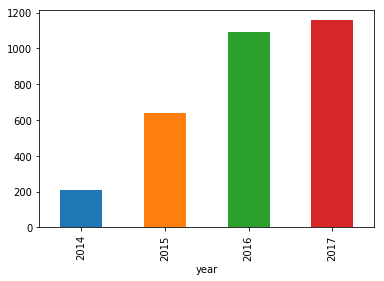

In [117]:
opioid_n.plot(kind='bar')

## Plot the number of fentanyl deaths by year, and the number of heroin deaths by year

- *Tip: You'll want to look up how to use `ylim` - it will let you set each graphic to use the same scale. This should be separate graphics.*
- *Tip: Pay attention to the numbers on your axes. `sort_index()` will be your friend.*
- *Tip: You should probably get rid of 2018*

(0.0, 700)

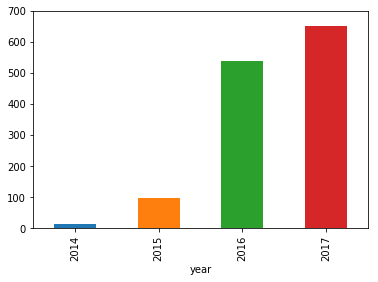

In [118]:
fentanyl_deaths = df[df.Primary_Cause.str.contains("fentanyl", case=False, na=False)]
#fentanyl_deaths
fenta = fentanyl_deaths[fentanyl_deaths.year!=2018]
fentanyl_n = fenta.groupby('year').Primary_Cause.count()
#fentanyl_n
fentanyl_graph = fentanyl_n.plot(kind='bar')
fentanyl_graph.set_ylim(ymax=700)

(0.0, 800)

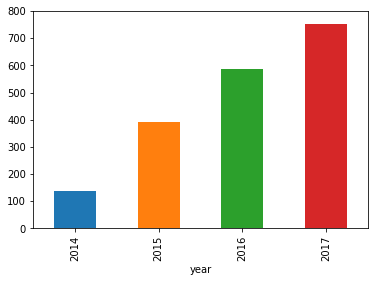

In [119]:
heroin_deaths = df[df.Primary_Cause.str.contains("heroin", case=False, na=False)]
#heroin_deaths
her = heroin_deaths[heroin_deaths.year!=2018]
heroin_n = her.groupby('year').Primary_Cause.count()
#heroin_n
heroin_graph = heroin_n.plot(kind='bar')
heroin_graph.set_ylim(ymax=800)

## How does this compare to gun deaths?

In [120]:
gun_deaths = df[(df.Gun_Related==True) & (df.year!=2018)].groupby('year').Gun_Related.count()
gun_deaths

year
2014    259
2015    665
2016    928
2017    896
Name: Gun_Related, dtype: int64

(0.0, 1000)

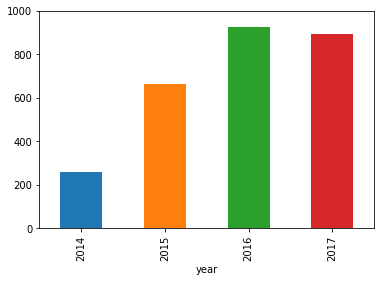

In [121]:
gun_graph = gun_deaths.plot(kind='bar')
gun_graph.set_ylim(ymax=1000)

## But hey: numbers can lie pretty easily!

The numbers are just so low in 2014 and much higher in 2017. What's going on there?

Well, maybe **there just isn't as much data from the earlier years**. Plot how many entries there are for each year.

In [122]:
df.groupby('year').year.count()

year
1999       1
2014    2149
2015    5591
2016    6288
2017    6061
2018    2420
Name: year, dtype: int64

And we don't know the best way to fix that up yet, so instead I'm going to give you a present.

# Is the true lesson here, don't move to Cook County, Illinois?

Cook County is basically Chicago. It's probably just certain areas that are trouble, right? Let's investigate that without even having a clue how mapping works.

## Fun bonus: Making cheating maps

### Make a new dataframe of every death in the actual city of Chicago

In [123]:
chicago = df[df.Incident_City=='CHICAGO']
#chicago

### Confirm this new dataframe has 13,627 rows

In [124]:
chicago.shape

(13627, 21)

### Use lat and long in the worst way possible to make a map

Use `longitude` and `latitude` and `plot` to make a rough map of the city. Chicago [looks like this](https://en.wikipedia.org/wiki/File:DuPage_County_Illinois_Incorporated_and_Unincorporated_areas_Chicago_Highlighted.svg)

- *Tip: Use the `latitude` and `longitude` columns*
- *Tip: You don't want a line graph, of course. Or a bar. What kind is the kind with dots on it?*
- *Tip: Use something like like `figsize=(10,5)` to specify the height and width of the map (but, you know, with better numbers that make it look like chicago)*

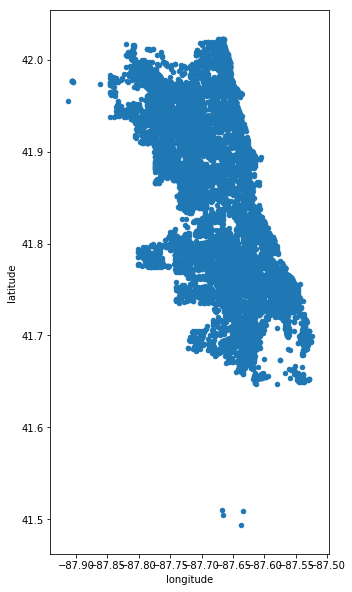

In [125]:
chicago.plot(x='longitude', y='latitude', kind="scatter", figsize=(5,10))

### Now let's find out where to live

Make a map of every non-homicide death in Chicago, then plot the homicides on top of it.

Use the `ax=df.plot` trick from the beer cans assignment to plot all of the rows representing homicides vs non-homicides. You can use `color='red'` to make one of them red, and `alpha=0.05` to make each mark very transparent to allow them to layer on top of each other.

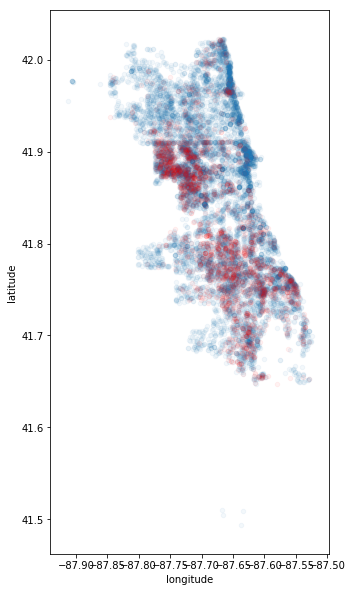

In [126]:
non_homi = chicago[chicago.Manner_of_Death!='HOMICIDE']
homi = chicago[chicago.Manner_of_Death=='HOMICIDE']
#non_homi
#homi
ax = non_homi.plot(x='longitude', y='latitude', kind="scatter", figsize=(5,10), alpha=0.05)
homi.plot(ax=ax,x='longitude', y='latitude', kind="scatter", figsize=(5,10), color = 'red', alpha=0.05 )

## Never tell anyone I let you do that.

But you want to see something actually completely legitimately insane?

**Chicago is one of the most segregated cities in America.** If you'd like to see this for yourself, make a map of `Race`. Plot black vs white in a way similar to what we did above.

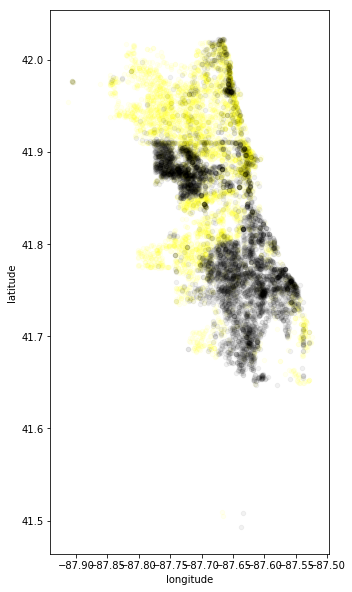

In [127]:
white = chicago[chicago.Race=='White']
black = chicago[chicago.Race=='Black']
#non_homi
#homi
ax = white.plot(x='longitude', y='latitude', kind="scatter", figsize=(5,10), color = 'yellow', alpha=0.05)
black.plot(ax=ax,x='longitude', y='latitude', kind="scatter", figsize=(5,10), color = 'black', alpha=0.05 )

Yup.